# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [3]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package

!pip install smdebug
!pip install jinja2
!pip install torchvision
!pip install torch

Keyring is skipped due to an exception: 'keyring.backends'
  Using cached smdebug-1.0.12-py2.py3-none-any.whl (270 kB)
  Using cached pyinstrument-3.4.2-py2.py3-none-any.whl (83 kB)
  Using cached pyinstrument_cext-0.2.4-cp37-cp37m-manylinux2010_x86_64.whl (20 kB)
Keyring is skipped due to an exception: 'keyring.backends'
Keyring is skipped due to an exception: 'keyring.backends'
  Using cached torchvision-0.14.0-cp37-cp37m-manylinux1_x86_64.whl (24.3 MB)
Keyring is skipped due to an exception: 'keyring.backends'


In [13]:
!pip install torchvision==0.10.0

Keyring is skipped due to an exception: 'keyring.backends'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.1/22.1 MB 38.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 831.4/831.4 MB 923.3 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0
    Uninstalling torch-1.10.0:
      Successfully uninstalled torch-1.10.0


In [11]:
!pip install torch==1.11.0

Keyring is skipped due to an exception: 'keyring.backends'


In [14]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker

#from smdebug.profiler.analysis.notebook_utils.training_job import TrainingJob
#from smdebug.profiler.analysis.notebook_utils.timeline_charts import TimelineCharts
import os
import IPython
from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)


import os
import io
import pandas as pd
import numpy as np
import sagemaker
import boto3
import matplotlib.pyplot as plt
import IPython
import torch

from sagemaker import get_execution_role
from sagemaker.pytorch.estimator import PyTorch
from sagemaker.pytorch.model import PyTorchModel
from sagemaker.tuner import IntegerParameter, CategoricalParameter, ContinuousParameter, HyperparameterTuner
from sagemaker.debugger import (Rule, ProfilerRule, DebuggerHookConfig, ProfilerConfig, FrameworkProfile, CollectionConfig,
rule_configs)
from sagemaker.serializers import IdentitySerializer
from sagemaker.deserializers import JSONDeserializer
from sagemaker.pytorch import PyTorchModel
from sagemaker.predictor import Predictor
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys
from mpl_toolkits.axes_grid1 import host_subplot
from PIL import Image
from torch.utils.data import DataLoader
from torchvision import models, transforms
#from torchvision.io import read_image
#from smdebug.profiler.analysis.notebook_utils.training_job import TrainingJob
#from smdebug.profiler.analysis.notebook_utils.timeline_charts import TimelineCharts

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [16]:
#TODO: Fetch and upload the data to AWS S3
#I preuploaded the data to S3 just using the S3 interface.
# Command to download and unzip data
#!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
#!unzip dogImages.zip
'''
bucket = "project3-image-data"
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()
region = "us-east-1"
data = "s3://{}/{}/".format(bucket, "image-data")
output = "s3://{}/{}/".format(bucket, "output")
model_dir = "s3://{}/{}/".format(bucket, "model")
os.environ["DEFAULT_S3_BUCKET"] = bucket
os.environ['SM_CHANNEL_TRAIN']= data 
os.environ['SM_OUTPUT_DATA_DIR']= output
os.environ['SM_MODEL_DIR']= model_dir

print("Default Bucket: {}".format(bucket))
print("AWS Region: {}".format(region))
print("RoleArn: {}".format(role))


sagemaker_session = sagemaker.Session()

bucket = sagemaker_session.default_bucket()
prefix = "sagemaker/DEMO-pytorch-cifar"

role = sagemaker.get_execution_role()

local_dir = 'data'
'''
'''SM_CHANNEL_TRAINING = "s3://project3-image-data/image-data/"
SM_OUTPUT_DATA_DIR= "s3://project3-image-data/image-data/output/"
SM_MODEL_DIR= "s3://project3-image-data/image-data/model/"
print(SM_MODEL_DIR)
role=sagemaker.get_execution_role()
print(role)
inputs = "s3://project3-image-data/image-data/" '''


!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip

--2022-11-23 11:22:29--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.113.128
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.113.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip.1’

dogImages.zip.1     100%[===================>]   1.05G  25.1MB/s    in 41s     

2022-11-23 11:23:11 (26.5 MB/s) - ‘dogImages.zip.1’ saved [1132023110/1132023110]

Archive:  dogImages.zip
replace dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [4]:
session = sagemaker.session.Session()
bucket = session.default_bucket()
role = get_execution_role()

inputs = session.upload_data(path='dogImages', bucket=bucket, key_prefix='data-project')

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [16]:
#TODO: Declare your HP ranges, metrics etc.
#os.environ["DEFAULT_S3_BUCKET"] = bucket

hyperparameter_ranges = {
    "lr": ContinuousParameter(0.001, 0.1),
    "batch_size": CategoricalParameter([16, 64, 256, 1024]),
    "epochs": IntegerParameter(2, 4)
}

#objective_metric_name = "Test Loss"
#objective_type = "Minimize"
#metric_definitions = [{"Name": "Test Loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]

#objective_metric_name = "Test Loss"
#objective_type = "Minimize"
#metric_definitions = [{"Name": "Test Loss", "Regex": "Testing Loss: ([0-9\\.]+)"}]


objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]

'''
hyperparameter_ranges = {
    "lr": ContinuousParameter(0.001, 0.1),
    "batch-size": CategoricalParameter([32, 64, 128, 256, 512]),
    "epochs": IntegerParameter(2, 4)
}

objective_metric_name = "average_test_loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average_test_loss", "Regex": "Test set: Average loss: (-?[0-9\\.]+)"}]
'''

'\nhyperparameter_ranges = {\n    "lr": ContinuousParameter(0.001, 0.1),\n    "batch-size": CategoricalParameter([32, 64, 128, 256, 512]),\n    "epochs": IntegerParameter(2, 4)\n}\n\nobjective_metric_name = "average_test_loss"\nobjective_type = "Minimize"\nmetric_definitions = [{"Name": "average_test_loss", "Regex": "Test set: Average loss: (-?[0-9\\.]+)"}]\n'

In [17]:
#TODO: Create estimators for your HPs
estimator = PyTorch(
    entry_point="hpo_NH2.py",
    role=sagemaker.get_execution_role(),
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.m5.2xlarge"
)

objective_metric_name = 'average test loss'
objective_type = 'Minimize'
metric_definitions = [{'Name': 'average test loss', 'Regex': 'Test set\\: Average loss\\: ([0-9\\.]+)'}]

tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=4,
    max_parallel_jobs=2,
    objective_type=objective_type,
) 
# TODO: Your HP tuner here

In [18]:
# TODO: Fit your HP Tuner

#tuner.fit({'train': inputs + 'train','test': inputs + 'test','val': inputs + 'valid'}) # TODO: Remember to include your data channels
input_data = 's3://sagemaker-us-east-1-095368982544/data-project'
tuner.fit(
    {
    'train': input_data + '/train',
    'test': input_data + '/test',
    'val': input_data + '/valid'
    }
 ) 

#tuner.fit({"train": inputs})'''

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


..................................................................................................................................................................................................................................................................................................................................................................................................................!


In [19]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator()

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()


2022-11-24 12:56:32 Starting - Found matching resource for reuse
2022-11-24 12:56:32 Downloading - Downloading input data
2022-11-24 12:56:32 Training - Training image download completed. Training in progress.
2022-11-24 12:56:32 Uploading - Uploading generated training model
2022-11-24 12:56:32 Completed - Resource retained for reuse


{'_tuning_objective_metric': '"average test loss"',
 'batch_size': '"64"',
 'epochs': '3',
 'lr': '0.036075889122516046',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2022-11-24-12-28-36-080"',
 'sagemaker_program': '"hpo_NH2.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-095368982544/pytorch-training-2022-11-24-12-28-36-080/source/sourcedir.tar.gz"'}

In [20]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator()

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()


2022-11-24 12:56:32 Starting - Found matching resource for reuse
2022-11-24 12:56:32 Downloading - Downloading input data
2022-11-24 12:56:32 Training - Training image download completed. Training in progress.
2022-11-24 12:56:32 Uploading - Uploading generated training model
2022-11-24 12:56:32 Completed - Resource retained for reuse


{'_tuning_objective_metric': '"average test loss"',
 'batch_size': '"64"',
 'epochs': '3',
 'lr': '0.036075889122516046',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2022-11-24-12-28-36-080"',
 'sagemaker_program': '"hpo_NH2.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-095368982544/pytorch-training-2022-11-24-12-28-36-080/source/sourcedir.tar.gz"'}

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [21]:
# TODO: Set up debugging and profiling rules and hooks
'''hyperparameters = {
    "batch_size": 2048,
    "epochs": 4,
    "lr"
    "gpu": True,
    "epoch": 2,
    "model": "resnet50",
}'''

rules = [
    Rule.sagemaker(rule_configs.loss_not_decreasing()),
    ProfilerRule.sagemaker(rule_configs.LowGPUUtilization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
]


profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=10)
)
collection_configs = [
    CollectionConfig(
        name="custom_losses",
        parameters={
            "include_regex": "CrossEntropyLoss_output_0",
            "train.save_interval": "100",
            "eval.save_interval": "10"
        }
    )
]

debugger_config = DebuggerHookConfig(
    collection_configs=collection_configs
)

batch_size = int(best_estimator.hyperparameters()['batch_size'][1:3])
epochs = int(best_estimator.hyperparameters()['epochs'])
lr = float(best_estimator.hyperparameters()['lr'])
hyperparameters = {'batch_size':batch_size, 'epochs': epochs, 'lr': lr}
print(hyperparameters)

{'batch_size': 64, 'epochs': 3, 'lr': 0.036075889122516046}


In [22]:
# TODO: Create and fit an estimator

estimator =  PyTorch(
    entry_point="train_model_NH1.py",
    #base_job_name="debug_dog_image",
    role=sagemaker.get_execution_role(),
    instance_count=1,
    instance_type="ml.m5.2xlarge",
    hyperparameters=hyperparameters,
    framework_version="1.8",
    py_version="py36",
    rules=rules,
    debugger_hook_config=debugger_config,
    profiler_config=profiler_config,
)
#estimator.fit(wait=True)# TODO: Your estimator here

In [23]:
input_data = 's3://sagemaker-us-east-1-095368982544/data-project'
estimator.fit(
    {
    'train': input_data + '/train',
    'test': input_data + '/test'#,
    #'val': input_data + '/valid'
    }
 ) 

2022-11-24 13:02:31 Starting - Starting the training job...
2022-11-24 13:02:57 Starting - Preparing the instances for trainingLossNotDecreasing: InProgress
VanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
LowGPUUtilization: InProgress
ProfilerReport: InProgress
......
2022-11-24 13:03:57 Downloading - Downloading input data......
2022-11-24 13:04:58 Training - Downloading the training image.....bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2022-11-24 13:05:46,264 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2022-11-24 13:05:46,267 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2022-11-24 13:05:46,275 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2022-11-24 13:05:46,283 sagemaker_pytorch_container.training INFO     Invoking user trainin

In [24]:
session = boto3.session.Session()
region = session.region_name

training_job_name = estimator.latest_training_job.name
client = estimator.sagemaker_session.sagemaker_client
description = client.describe_training_job(TrainingJobName=training_job_name)
print(f"Training jobname: {training_job_name}")
print(f"Region: {region}")

Training jobname: pytorch-training-2022-11-24-13-02-31-107
Region: us-east-1


In [25]:
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys

trial = create_trial(estimator.latest_job_debugger_artifacts_path())

[2022-11-24 13:20:13.078 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:18 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-095368982544/pytorch-training-2022-11-24-13-02-31-107/debug-output


In [26]:
trial.tensor_names()

[2022-11-24 13:20:13.859 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:18 INFO trial.py:198] Training has ended, will refresh one final time in 1 sec.
[2022-11-24 13:20:14.885 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:18 INFO trial.py:210] Loaded all steps


['CrossEntropyLoss_output_0',
 'gradient/ResNet_fc.0.bias',
 'gradient/ResNet_fc.0.weight',
 'gradient/ResNet_fc.2.bias',
 'gradient/ResNet_fc.2.weight',
 'layer1.0.relu_input_0',
 'layer1.0.relu_input_1',
 'layer1.0.relu_input_2',
 'layer1.1.relu_input_0',
 'layer1.1.relu_input_1',
 'layer1.1.relu_input_2',
 'layer1.2.relu_input_0',
 'layer1.2.relu_input_1',
 'layer1.2.relu_input_2',
 'layer2.0.relu_input_0',
 'layer2.0.relu_input_1',
 'layer2.0.relu_input_2',
 'layer2.1.relu_input_0',
 'layer2.1.relu_input_1',
 'layer2.1.relu_input_2',
 'layer2.2.relu_input_0',
 'layer2.2.relu_input_1',
 'layer2.2.relu_input_2',
 'layer2.3.relu_input_0',
 'layer2.3.relu_input_1',
 'layer2.3.relu_input_2',
 'layer3.0.relu_input_0',
 'layer3.0.relu_input_1',
 'layer3.0.relu_input_2',
 'layer3.1.relu_input_0',
 'layer3.1.relu_input_1',
 'layer3.1.relu_input_2',
 'layer3.2.relu_input_0',
 'layer3.2.relu_input_1',
 'layer3.2.relu_input_2',
 'layer3.3.relu_input_0',
 'layer3.3.relu_input_1',
 'layer3.3.rel

In [27]:
len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.TRAIN))

1

In [28]:
len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.EVAL))

11

In [29]:
def get_data(trial, tname, mode):
    tensor = trial.tensor(tname)
    steps = tensor.steps(mode=mode)
    vals = []
    for s in steps:
        vals.append(tensor.value(s, mode=mode))
    return steps, vals

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot


def plot_tensor(trial, tensor_name):

    steps_train, vals_train = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    print("loaded TRAIN data")
    steps_eval, vals_eval = get_data(trial, tensor_name, mode=ModeKeys.EVAL)
    print("loaded EVAL data")

    fig = plt.figure(figsize=(10, 7))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAIN)")
    par.set_xlabel("Steps (EVAL)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(steps_train, vals_train, label=tensor_name)
    print("completed TRAIN plot")
    (p2,) = par.plot(steps_eval, vals_eval, label="val_" + tensor_name)
    print("completed EVAL plot")
    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)

    plt.show()

loaded TRAIN data
loaded EVAL data
completed TRAIN plot
completed EVAL plot


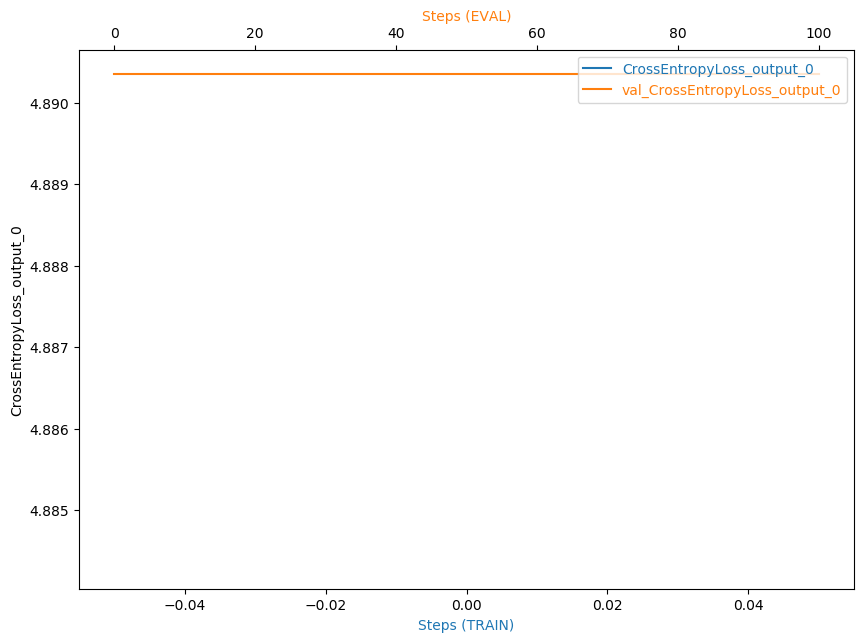

In [31]:
plot_tensor(trial, "CrossEntropyLoss_output_0")

In [32]:
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"

In [33]:
! aws s3 ls {rule_output_path} --recursive

2022-11-24 13:19:41     375391 pytorch-training-2022-11-24-13-02-31-107/rule-output/ProfilerReport/profiler-output/profiler-report.html
2022-11-24 13:19:41     223313 pytorch-training-2022-11-24-13-02-31-107/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2022-11-24 13:19:35        192 pytorch-training-2022-11-24-13-02-31-107/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2022-11-24 13:19:35        200 pytorch-training-2022-11-24-13-02-31-107/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2022-11-24 13:19:35       2089 pytorch-training-2022-11-24-13-02-31-107/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2022-11-24 13:19:35        127 pytorch-training-2022-11-24-13-02-31-107/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
2022-11-24 13:19:35        199 pytorch-training-2022-11-24-13-02-31-107/rule-output/ProfilerReport/profiler-output/profiler-re

In [34]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-1-095368982544/pytorch-training-2022-11-24-13-02-31-107/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json to ProfilerReport/profiler-output/profiler-reports/BatchSize.json
download: s3://sagemaker-us-east-1-095368982544/pytorch-training-2022-11-24-13-02-31-107/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json to ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
download: s3://sagemaker-us-east-1-095368982544/pytorch-training-2022-11-24-13-02-31-107/rule-output/ProfilerReport/profiler-output/profiler-report.html to ProfilerReport/profiler-output/profiler-report.html
download: s3://sagemaker-us-east-1-095368982544/pytorch-training-2022-11-24-13-02-31-107/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb to ProfilerReport/profiler-output/profiler-report.ipynb
download: s3://sagemaker-us-east-1-095368982544/pytorch-training-2022-11-24-13-02-31-107/rule-output/ProfilerRepor

In [35]:
import os

# get the autogenerated folder name of profiler report
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

In [36]:
import IPython

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

In [37]:
# TODO: Display the profiler output
IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

## Model Deploying

In [39]:
# TODO: Deploy your model to an endpoint

predictor=estimator.deploy(initial_instance_count=1, instance_type="ml.m5.2xlarge") # TODO: Add your deployment configuration like instance type and number of instances

-----!

In [ ]:
# TODO: Run an prediction on the endpoint

image = my_preprocessed_tensor.numpy()# TODO: Your code to load and preprocess image to send to endpoint for prediction
response = predictor.predict(image)

In [41]:
import os, random
from matplotlib import image

random_image_folder = random.choice(os.listdir("dogImages/test")) 
random_image = random.choice(os.listdir("dogImages/test/"+random_image_folder))
print(random_image)

data_dir = 'dogImages/test/'+random_image_folder+'/'+random_image
print(data_dir)

Japanese_chin_06174.jpg
dogImages/test/091.Japanese_chin/Japanese_chin_06174.jpg


In [42]:
import io
import torchvision.transforms

from PIL import Image

img = Image.open(data_dir)

testing_transform = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

image = testing_transform(img)
image = image.unsqueeze(dim=0)
image.shape

torch.Size([1, 3, 224, 224])

In [43]:
response = predictor.predict(image)

ModelError: An error occurred (ModelError) when calling the InvokeEndpoint operation: Received server error (0) from primary with message "Your invocation timed out while waiting for a response from container primary. Review the latency metrics for each container in Amazon CloudWatch, resolve the issue, and try again.". See https://us-east-1.console.aws.amazon.com/cloudwatch/home?region=us-east-1#logEventViewer:group=/aws/sagemaker/Endpoints/pytorch-training-2022-11-24-13-27-10-219 in account 095368982544 for more information.

In [ ]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()